In [1]:
#imports
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')
from scipy.stats import randint

In [2]:
#The data
data = pd.read_csv('../data/kindey stone urine analysis.csv')
data.head(5)
alpha = 0.05

In [3]:
X = np.array(data.ph)
Y = np.array(data.urea)
B=1000

In [4]:
#Distributions
discrete_uniform = randint(low = 0, high=79)

## The bootstrap-t

In [5]:
def bootstrap_samples(sampling_distribution, X, B):
    X_star = np.empty(shape=(B,len(X)))
    for i in range(B):
        X_star[i] = X[sampling_distribution.rvs(size=len(X))]
    return X_star

In [6]:
def plug_in_estimate(X, statistic):
    return statistic(X)

In [7]:
corr_estimate = np.corrcoef(X,Y)[0][1]

In [8]:
corr_estimate

-0.2755569443216652

In [9]:
def se_corr(X,Y,B,sampling_distribution):
    T_star_arr = np.empty(shape=(B))
    for i in range(B):
        idx = sampling_distribution.rvs(size=len(X))
        T_star_arr[i] = np.corrcoef(X[idx], Y[idx])[0][1]
    return np.sqrt((1/(B-1))*np.sum((T_star_arr-T_star_arr.mean()*np.ones(B))**2))

In [10]:
def bootstrap_corrcoef_std(sampling_distribution,X,Y,B):
    T_star = np.empty(shape=(B))
    se_corr_arr = np.empty(shape=(B))
    X_star = np.empty(shape=(B,len(X)))
    Y_star = np.empty(shape=(B,len(Y)))
    for i in range(B):
        idx = sampling_distribution.rvs(size=len(X))
        X_star_i = np.array(X[idx])
        Y_star_i = np.array(Y[idx])
        X_star[i] = X_star_i
        Y_star[i] = Y_star_i
        se_corr_arr[i] = se_corr(X_star_i,Y_star_i,200,randint(low = 0, high=len(X_star_i)))
        T_star_i = np.corrcoef(X_star_i, Y_star_i)[0][1]
        T_star[i] = T_star_i
    return se_corr_arr, T_star

In [11]:
std_corr_boot, T_star = bootstrap_corrcoef_std(discrete_uniform, X,Y,B)

<AxesSubplot:ylabel='Count'>

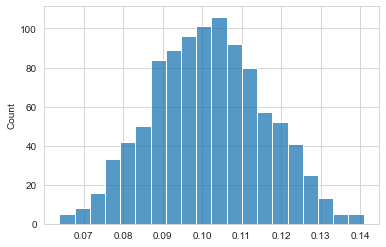

In [12]:
sns.histplot(std_corr_boot)

<AxesSubplot:ylabel='Count'>

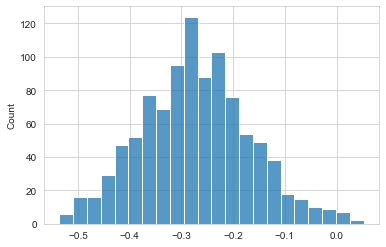

In [13]:
sns.histplot(T_star)

In [14]:
def compute_z_star(plug_in_est, T_star, std_arr):
    z = np.empty(len(T_star))
    for i, T in enumerate(T_star):
        z[i] = (T-plug_in_est)/std_arr[i]
    return z

In [15]:
Z_star = compute_z_star(corr_estimate, T_star, std_corr_boot)

In [16]:
Z_star.sort()

<AxesSubplot:ylabel='Count'>

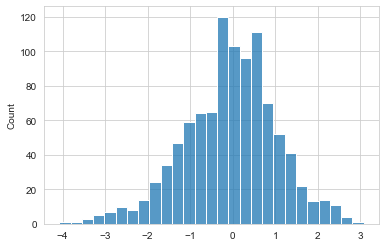

In [17]:
sns.histplot(Z_star)

In [18]:
def get_bootstrap_percentile(Z_star, alpha, B):
    idx = int(np.floor(alpha*B))
    return Z_star[idx]

In [19]:
t_complement_alpha_2 = get_bootstrap_percentile(Z_star, 1-alpha/2, B)
t_alpha_2 = get_bootstrap_percentile(Z_star, alpha/2, B)

In [20]:
corr_estimate

-0.2755569443216652

In [21]:
t_alpha_2

-2.5035484697455916

In [22]:
se_estimate = se_corr(X,Y,B,randint(low = 0, high=len(X)))

In [23]:
theta_lo = corr_estimate-t_complement_alpha_2 *se_estimate
theta_hi = corr_estimate-t_alpha_2 *se_estimate
theta_lo, theta_hi = min(theta_lo, theta_hi), max(theta_lo, theta_hi)

In [24]:
print("Bootstrap-t CI: ({},{})".format(theta_lo, theta_hi))

Bootstrap-t CI: (-0.4994996696855042,-0.010714509544176576)


In [25]:
corr_estimate-theta_lo

0.22394272536383897

In [26]:
theta_hi - corr_estimate

0.26484243477748864

In [27]:
def shape(estimate, up, low):
    return (up-estimate)/(estimate-low)

In [28]:
shape(corr_estimate, theta_hi, theta_lo)

1.18263468637885

In [29]:
T_star

array([-0.36627457, -0.30407222, -0.36622415, -0.08724929, -0.21959379,
       -0.28267163, -0.26703123, -0.22810971, -0.10207028, -0.192733  ,
       -0.16915465, -0.28888868, -0.28600859, -0.30381894, -0.13316764,
       -0.41015155, -0.39845802, -0.28314852, -0.25150751, -0.12272296,
       -0.16094811, -0.28917974, -0.2507293 , -0.21917195, -0.2018268 ,
       -0.12068796, -0.19736774, -0.35063805, -0.159844  , -0.42125891,
       -0.21252695, -0.31999495, -0.15768176, -0.12325649, -0.24718921,
       -0.41779438, -0.23603244, -0.29954038, -0.21735722, -0.25617319,
       -0.18988485, -0.36606448, -0.16065037, -0.30670176, -0.02232221,
       -0.28217408, -0.37816305, -0.21439337, -0.41426554, -0.28418209,
       -0.20600428, -0.16949759,  0.04856815, -0.31428009, -0.24380244,
       -0.27255277, -0.37663997, -0.14685213, -0.25472901, -0.30718685,
       -0.12603307, -0.29105506, -0.26007053, -0.05359746, -0.45504993,
        0.00557633, -0.18460832, -0.42323051, -0.17431369, -0.34

In [30]:
from scipy.stats import skew

In [31]:
skew(T_star)

0.16706423653897626

In [32]:
theta_hi-theta_lo

0.4887851601413276

### Bootstrap percentile intervals

<AxesSubplot:ylabel='Count'>

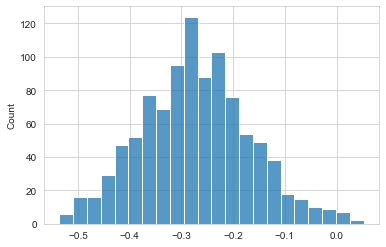

In [33]:
sns.histplot(T_star)

In [34]:
def bootstrap_samples(sampling_distribution, X, B):
    X_star = np.empty(shape=(B,len(X)))
    for i in range(B):
        X_star[i] = X[sampling_distribution.rvs(size=len(X))]
    return X_star

In [35]:
T_star = sorted(T_star)

In [36]:
x_stars = bootstrap_samples(randint(low = 0, high=79), X, B)

In [37]:
def var(X):
    return (np.sum((X-np.ones(len(X))*X.mean()))**2)/len(X)

In [38]:
bootstrapped_vars = np.empty(B)
for i in range(B):
    bootstrapped_vars[i] = var(x_stars[i])

<AxesSubplot:ylabel='Count'>

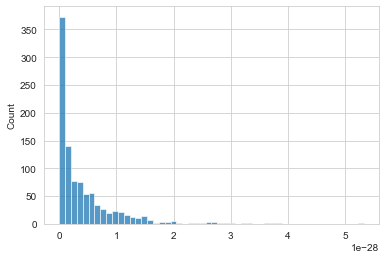

In [39]:
sns.histplot(bootstrapped_vars)

In [40]:
bootstrapped_vars.sort()

In [41]:
def percentile_interval(bootstrapped_statistics, alpha):
    return bootstrapped_statistics[int(len(bootstrapped_statistics)*alpha)//1], bootstrapped_statistics[int(len(bootstrapped_statistics)*(1-alpha))//1]

In [42]:
theta_lo, theta_hi = percentile_interval(T_star, 0.05)

In [43]:
print(f"Length = {theta_hi-theta_lo}")

Length = 0.3481449769164528


In [44]:
print(f"Shape = {shape(corr_estimate, theta_hi, theta_lo)}")

Shape = 1.0612445641252481


In [45]:
(0.4456-0.3437)*100/0.4456

22.868043087971273

### Bias Corrected and accelerated (BCa)

In [46]:
def jacknife_bivariate_samples(X,Y):
    arr = []
    for i in range(len(X)-1):
        arr.append(list(zip(np.append(X[:i][:], X[i+1:][:]), np.append(Y[:i][:], Y[i+1:][:]))))
    arr.append(list(zip(X[:-1][:],Y[:-1][:])))
    return np.array(arr)

In [47]:
shanked_xy = jacknife_bivariate_samples(X,Y)

In [48]:
shanked_xy.shape

(79, 78, 2)

In [49]:
def jacknife_samples(X):
    arr = np.empty((len(X), len(X)-1))
    for i in range(len(X)-1):
        arr[i] = np.append(X[:i][:], X[i+1:][:])
    arr[-1] = X[:-1][:]
    return arr

In [51]:
shanked_xy = np.empty((2, len(X), len(X)-1))
shanked_xy[0] = jacknife_samples(X)
shanked_xy[1] = jacknife_samples(Y)

In [61]:
theta_shanked = np.empty(len(X))
for i in range(len(X)):
    theta_shanked[i] = np.corrcoef(shanked_xy[0][i][:], shanked_xy[1][i][:])[0][1]

In [74]:
theta_shanked = np.array(sorted(theta_shanked))

In [69]:
def acceleration(shanked_statistics):
    n = len(shanked_statistics)
    shanked_mean = shanked_statistics.mean()*np.ones(n)
    denominator = np.sum((shanked_mean-shanked_statistics)**3)
    nominator = 6*np.sum((shanked_mean-shanked_statistics)**2)**(3/2)
    return denominator/nominator

In [70]:
from statistics import NormalDist
def bias_correction(boostrapped_stats, plug_in_estimation, B):
    logic_arr = sorted(boostrapped_stats) < plug_in_estimation
    return NormalDist(mu=0, sigma=1).inv_cdf(np.sum(logic_arr)/B)

In [71]:
from statistics import NormalDist
def BCa_alphas(z_0, acc, alpha):
    standard_normal = NormalDist(mu=0, sigma=1)
    alpha_one = standard_normal.cdf(z_0+(z_0+standard_normal.inv_cdf(alpha/2))/(1-acc*(z_0+standard_normal.inv_cdf(alpha/2))))
    alpha_two = standard_normal.cdf(z_0+(z_0+standard_normal.inv_cdf(1-alpha/2))/(1-acc*(z_0+standard_normal.inv_cdf(1-alpha/2))))
    return alpha_one, alpha_two

In [72]:
def BCa_confidence_interval(bootstrapped_stats, alpha_one, alpha_two):
    B = len(bootstrapped_stats)
    return bootstrapped_stats[int(B*alpha_one//1)], bootstrapped_stats[int(B*alpha_two//1)]

In [ ]:
def bootstrapped_statistics(x_stars, statistic):
    thetas = np.empty(len(x_stars))
    for i,x_star in enumerate(x_stars):
        thetas[i] = statistic(x_star)
    return thetas

In [67]:
theta_stars = T_star

In [75]:
acc = acceleration(theta_shanked)
z_0 = bias_correction(theta_stars, np.corrcoef(X,Y)[0][1], B)

In [76]:
alpha_one, alpha_two = BCa_alphas(z_0, acc, alpha)

In [77]:
alpha_one

0.032034342339263944

In [78]:
alpha_two

0.9811347613377702

In [81]:
lower,upper = BCa_confidence_interval(theta_stars, alpha_one, alpha_two)

In [82]:
print(f"Length = {upper-lower}")
print(f"Shape = {shape(np.corrcoef(X,Y)[0][1],lower,upper)}")

Length = 0.4271440148565759
Shape = 0.7728923765480845


In [83]:
lower, upper

(-0.4617703643452666, -0.03462634948869068)

<AxesSubplot:ylabel='Count'>

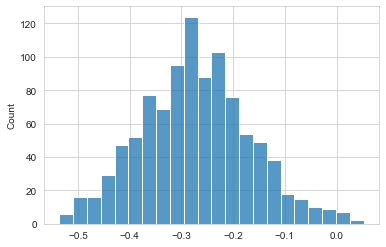

In [84]:
sns.histplot(T_star)